In [876]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import scorecardpy as sc

# Represent data in standard decimal notation
pd.options.display.float_format = '{:.2f}'.format

### Load Application and Bureau Data

In [877]:
app_data = pd.read_csv('application_data.csv')
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [878]:
bureau_data = pd.read_csv("bureau_data.csv")
bureau_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


## 1. Data Exploration

- graphically show the organization types countplot
- graphically show age ranges countplot
- distribution graphs
- create new features

## 2. Data Preparation

### Select Columns and Filter Out Self-Employed & Age (application_data.csv)


In [879]:
# list of selected cols from applicate_data.csv
selected_cols_application = ["SK_ID_CURR", 
                              "TARGET",
                              "FLAG_OWN_CAR",
                              "FLAG_OWN_REALTY",
                              "CNT_CHILDREN",
                              "AMT_INCOME_TOTAL",
                              "AMT_CREDIT",
                              "AMT_ANNUITY",
                              "AMT_GOODS_PRICE",
                              "NAME_INCOME_TYPE",
                              "NAME_EDUCATION_TYPE",
                              "NAME_FAMILY_STATUS",
                              "NAME_HOUSING_TYPE",
                              "REGION_POPULATION_RELATIVE",
                              "DAYS_BIRTH",
                              "DAYS_EMPLOYED",
                              "DAYS_REGISTRATION",
                              "DAYS_ID_PUBLISH",
                              "OWN_CAR_AGE",
                              "OCCUPATION_TYPE",
                              "CNT_FAM_MEMBERS",
                              "REGION_RATING_CLIENT",
                              "REGION_RATING_CLIENT_W_CITY",
                              "EXT_SOURCE_1",
                              "EXT_SOURCE_2",
                              "EXT_SOURCE_3",
                              "OBS_30_CNT_SOCIAL_CIRCLE",
                              "DEF_30_CNT_SOCIAL_CIRCLE",
                              "OBS_60_CNT_SOCIAL_CIRCLE",
                              "DEF_60_CNT_SOCIAL_CIRCLE",
                              "AMT_REQ_CREDIT_BUREAU_HOUR",
                              "AMT_REQ_CREDIT_BUREAU_DAY",
                              "AMT_REQ_CREDIT_BUREAU_WEEK",
                              "AMT_REQ_CREDIT_BUREAU_MON",
                              "AMT_REQ_CREDIT_BUREAU_QRT",
                              "AMT_REQ_CREDIT_BUREAU_YEAR"]

# extract selected columns and filter by self-employed
filtered_app_data = app_data[app_data['ORGANIZATION_TYPE'] == 'Self-employed'][selected_cols_application]
filtered_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38412 entries, 13 to 307504
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   38412 non-null  int64  
 1   TARGET                       38412 non-null  int64  
 2   FLAG_OWN_CAR                 38412 non-null  object 
 3   FLAG_OWN_REALTY              38412 non-null  object 
 4   CNT_CHILDREN                 38412 non-null  int64  
 5   AMT_INCOME_TOTAL             38412 non-null  float64
 6   AMT_CREDIT                   38412 non-null  float64
 7   AMT_ANNUITY                  38409 non-null  float64
 8   AMT_GOODS_PRICE              38360 non-null  float64
 9   NAME_INCOME_TYPE             38412 non-null  object 
 10  NAME_EDUCATION_TYPE          38412 non-null  object 
 11  NAME_FAMILY_STATUS           38412 non-null  object 
 12  NAME_HOUSING_TYPE            38412 non-null  object 
 13  REGION_POPULATION_R

In [880]:
# create AGE variable using DAYS_BIRTH
filtered_app_data['AGE'] = filtered_app_data['DAYS_BIRTH']/-365
filtered_app_data['AGE'] = filtered_app_data['AGE'].astype(int)

# drop DAYS_BIRTH variables - no longer needed since AGE already exists
filtered_app_data.drop("DAYS_BIRTH", axis=1, inplace=True)

In [881]:
# Select records with applicants aged between 18 and 35
filtered_app_data = filtered_app_data[(filtered_app_data["AGE"] >= 18) & (filtered_app_data["AGE"] <= 35)]

In [882]:
# Select records with applicants with credit amount < 500k
filtered_app_data = filtered_app_data[(filtered_app_data["AMT_CREDIT"] <= 500000)]
filtered_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8271 entries, 22 to 307457
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   8271 non-null   int64  
 1   TARGET                       8271 non-null   int64  
 2   FLAG_OWN_CAR                 8271 non-null   object 
 3   FLAG_OWN_REALTY              8271 non-null   object 
 4   CNT_CHILDREN                 8271 non-null   int64  
 5   AMT_INCOME_TOTAL             8271 non-null   float64
 6   AMT_CREDIT                   8271 non-null   float64
 7   AMT_ANNUITY                  8271 non-null   float64
 8   AMT_GOODS_PRICE              8249 non-null   float64
 9   NAME_INCOME_TYPE             8271 non-null   object 
 10  NAME_EDUCATION_TYPE          8271 non-null   object 
 11  NAME_FAMILY_STATUS           8271 non-null   object 
 12  NAME_HOUSING_TYPE            8271 non-null   object 
 13  REGION_POPULATION_RE

In [883]:
# identify columns with NULL values
filtered_app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  22
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                    5447
OCCUPATION_TYPE                 739
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
EXT_SOURCE_1                   3570
EXT_SOURCE_2                     19
EXT_SOURCE_3                   2456
OBS_30_CNT_SOCIAL_CIRCLE         35
DEF_30_CNT_SOCIAL_CIRCLE         35
OBS_60_CNT_SOCIAL_CIRCLE    

### Select Columns (bureau_data.csv)

In [884]:
# list selected columns
selected_cols_bureau = ["SK_ID_CURR",
                        "AMT_CREDIT_MAX_OVERDUE",
                        "CNT_CREDIT_PROLONG",
                        "AMT_CREDIT_SUM",
                        "AMT_CREDIT_SUM_DEBT",
                        "AMT_CREDIT_SUM_LIMIT",
                        "AMT_CREDIT_SUM_OVERDUE",
                        "CREDIT_ACTIVE",]

# extract selected columns of bureau data
filtered_bureau_data = bureau_data[selected_cols_bureau]
filtered_bureau_data

,SK_ID_CURR,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_ACTIVE
0,215354,NaN,0,91323.00,0.00,NaN,0.00,Closed
1,215354,NaN,0,225000.00,171342.00,NaN,0.00,Active
2,215354,NaN,0,464323.50,NaN,NaN,0.00,Active
3,215354,NaN,0,90000.00,NaN,NaN,0.00,Active
4,215354,77674.50,0,2700000.00,NaN,NaN,0.00,Active
...,...,...,...,...,...,...,...,...
1716423,259355,0.00,0,11250.00,11250.00,0.00,0.00,Active
1716424,100044,5476.50,0,38130.84,0.00,0.00,0.00,Closed
1716425,100044,NaN,0,15570.00,NaN,NaN,0.00,Closed
1716426,246829,NaN,0,36000.00,0.00,0.00,0.00,Closed


#### Aggregate Credit Bureau Data

In [885]:


# Create new column to count number of active loans using num_loan_dataset
active_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Active")].groupby("SK_ID_CURR").count())
active_loan.rename(columns={"CREDIT_ACTIVE": "NUM_ACTIVE_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_ACTIVE_LOANS
active_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

# Create new column to count number of sold loans using num_loan_dataset
sold_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Sold")].groupby("SK_ID_CURR").count())
sold_loan.rename(columns={"CREDIT_ACTIVE": "NUM_SOLD_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_SOLD_LOANS
sold_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

# Create new column to count number of bad debt loans using num_loan_dataset
bad_debt_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Bad debt")].groupby("SK_ID_CURR").count())
bad_debt_loan.rename(columns={"CREDIT_ACTIVE": "NUM_BAD_DEBT_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_BAD_DEBT_LOANS
bad_debt_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

# Create new column to count number of closed loans using num_loan_dataset
closed_loan = pd.DataFrame(filtered_bureau_data[(filtered_bureau_data["CREDIT_ACTIVE"]=="Closed")].groupby("SK_ID_CURR").count())
closed_loan.rename(columns={"CREDIT_ACTIVE": "NUM_CLOSED_LOANS"}, inplace=True)
# Drop everything but SK_ID_CURR and NUM_CLOSED_LOANS
closed_loan.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE"], axis=1, inplace=True)

#craete a new column to count number of total loans using num_loan_dataset per person
total_loan = pd.DataFrame(filtered_bureau_data.groupby("SK_ID_CURR").count())

# Join all the above by SK_ID_CURR
num_loan_dataset = pd.merge(active_loan, sold_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset = pd.merge(num_loan_dataset, bad_debt_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset = pd.merge(num_loan_dataset, closed_loan, on="SK_ID_CURR", how="outer")
num_loan_dataset.fillna(0, inplace=True)
num_loan_dataset["ACTIVE_CLOSE_DEBT_RATIO"] = num_loan_dataset["NUM_ACTIVE_LOANS"] / num_loan_dataset["NUM_CLOSED_LOANS"]
num_loan_dataset["BAD_DEBT_CLOSE_RATIO"] = num_loan_dataset["NUM_BAD_DEBT_LOANS"] / num_loan_dataset["NUM_CLOSED_LOANS"]

# Drop Active, Bad debt and Closed columns
num_loan_dataset.drop(["NUM_ACTIVE_LOANS", "NUM_CLOSED_LOANS","NUM_BAD_DEBT_LOANS"], axis=1, inplace=True)


# Average AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_SUM for each SK_ID_CURR 

avg_bureau_data = filtered_bureau_data.drop("CREDIT_ACTIVE", axis=1).groupby("SK_ID_CURR").mean()
avg_bureau_data
# Drop all columns except SK_ID_CURR, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_OVERDUE, AMT_CREDIT_SUM
avg_bureau_data.drop(["AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM_LIMIT"], axis=1, inplace=True)
# Rename columns to include "AVG_" prefix
avg_bureau_data.rename(columns={"AMT_CREDIT_SUM": "AVG_AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT": "AVG_AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_OVERDUE": "AVG_AMT_CREDIT_SUM_OVERDUE"}, inplace=True)
# Merge with num_active_loans
aggregated_credit_bureau_data = pd.merge(avg_bureau_data, num_loan_dataset,on="SK_ID_CURR")

aggregated_credit_bureau_data

,AVG_AMT_CREDIT_SUM,AVG_AMT_CREDIT_SUM_DEBT,AVG_AMT_CREDIT_SUM_OVERDUE,NUM_SOLD_LOANS,ACTIVE_CLOSE_DEBT_RATIO,BAD_DEBT_CLOSE_RATIO
SK_ID_CURR,,,,,,
100001,207623.57,85240.93,0.00,0.00,0.75,0.00
100002,108131.95,49156.20,0.00,0.00,0.33,0.00
100003,254350.12,0.00,0.00,0.00,0.33,0.00
100004,94518.90,0.00,0.00,0.00,0.00,0.00
100005,219042.00,189469.50,0.00,0.00,2.00,0.00
...,...,...,...,...,...,...
456249,284142.97,16307.10,0.00,0.00,0.18,0.00
456250,1028819.85,744013.36,0.00,0.00,2.00,0.00
456253,990000.00,448958.25,0.00,0.00,1.00,0.00


### Join Application and Bureau Data

In [886]:
# left join
unclean_merged_data = filtered_app_data.merge(aggregated_credit_bureau_data, how="left", on="SK_ID_CURR")

In [887]:
unclean_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8271 entries, 0 to 8270
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   8271 non-null   int64  
 1   TARGET                       8271 non-null   int64  
 2   FLAG_OWN_CAR                 8271 non-null   object 
 3   FLAG_OWN_REALTY              8271 non-null   object 
 4   CNT_CHILDREN                 8271 non-null   int64  
 5   AMT_INCOME_TOTAL             8271 non-null   float64
 6   AMT_CREDIT                   8271 non-null   float64
 7   AMT_ANNUITY                  8271 non-null   float64
 8   AMT_GOODS_PRICE              8249 non-null   float64
 9   NAME_INCOME_TYPE             8271 non-null   object 
 10  NAME_EDUCATION_TYPE          8271 non-null   object 
 11  NAME_FAMILY_STATUS           8271 non-null   object 
 12  NAME_HOUSING_TYPE            8271 non-null   object 
 13  REGION_POPULATION_

### Data Cleaning

### Handling Missing Values

To address missing values, the team decided to leave them as missing as adding filling these data could skew the model in the wrong direction

In [888]:
## Get Propotion of Null Values 
# Total number of records
total_records = unclean_merged_data.shape[0]

# Get proportion of null values for each column
null_propotion = unclean_merged_data.isnull().sum()/total_records

# Get columns with null values > 10%
null_propotion[null_propotion > 0.2]


OWN_CAR_AGE                  0.66
EXT_SOURCE_1                 0.43
EXT_SOURCE_3                 0.30
AMT_REQ_CREDIT_BUREAU_HOUR   0.21
AMT_REQ_CREDIT_BUREAU_DAY    0.21
AMT_REQ_CREDIT_BUREAU_WEEK   0.21
AMT_REQ_CREDIT_BUREAU_MON    0.21
AMT_REQ_CREDIT_BUREAU_QRT    0.21
AMT_REQ_CREDIT_BUREAU_YEAR   0.21
AVG_AMT_CREDIT_SUM           0.22
AVG_AMT_CREDIT_SUM_DEBT      0.24
AVG_AMT_CREDIT_SUM_OVERDUE   0.22
NUM_SOLD_LOANS               0.22
ACTIVE_CLOSE_DEBT_RATIO      0.22
BAD_DEBT_CLOSE_RATIO         0.37
dtype: float64

#### Drop Columns with high proportion of missing data

In [889]:
# Drop Columns with null values > 60%
unclean_merged_data.drop(["OWN_CAR_AGE"], axis=1, inplace=True)

### Identifying Outliers

To address outliers, our team identified extreme outliers and used business reasons to decide whether to keep, replace, or delete the outliers

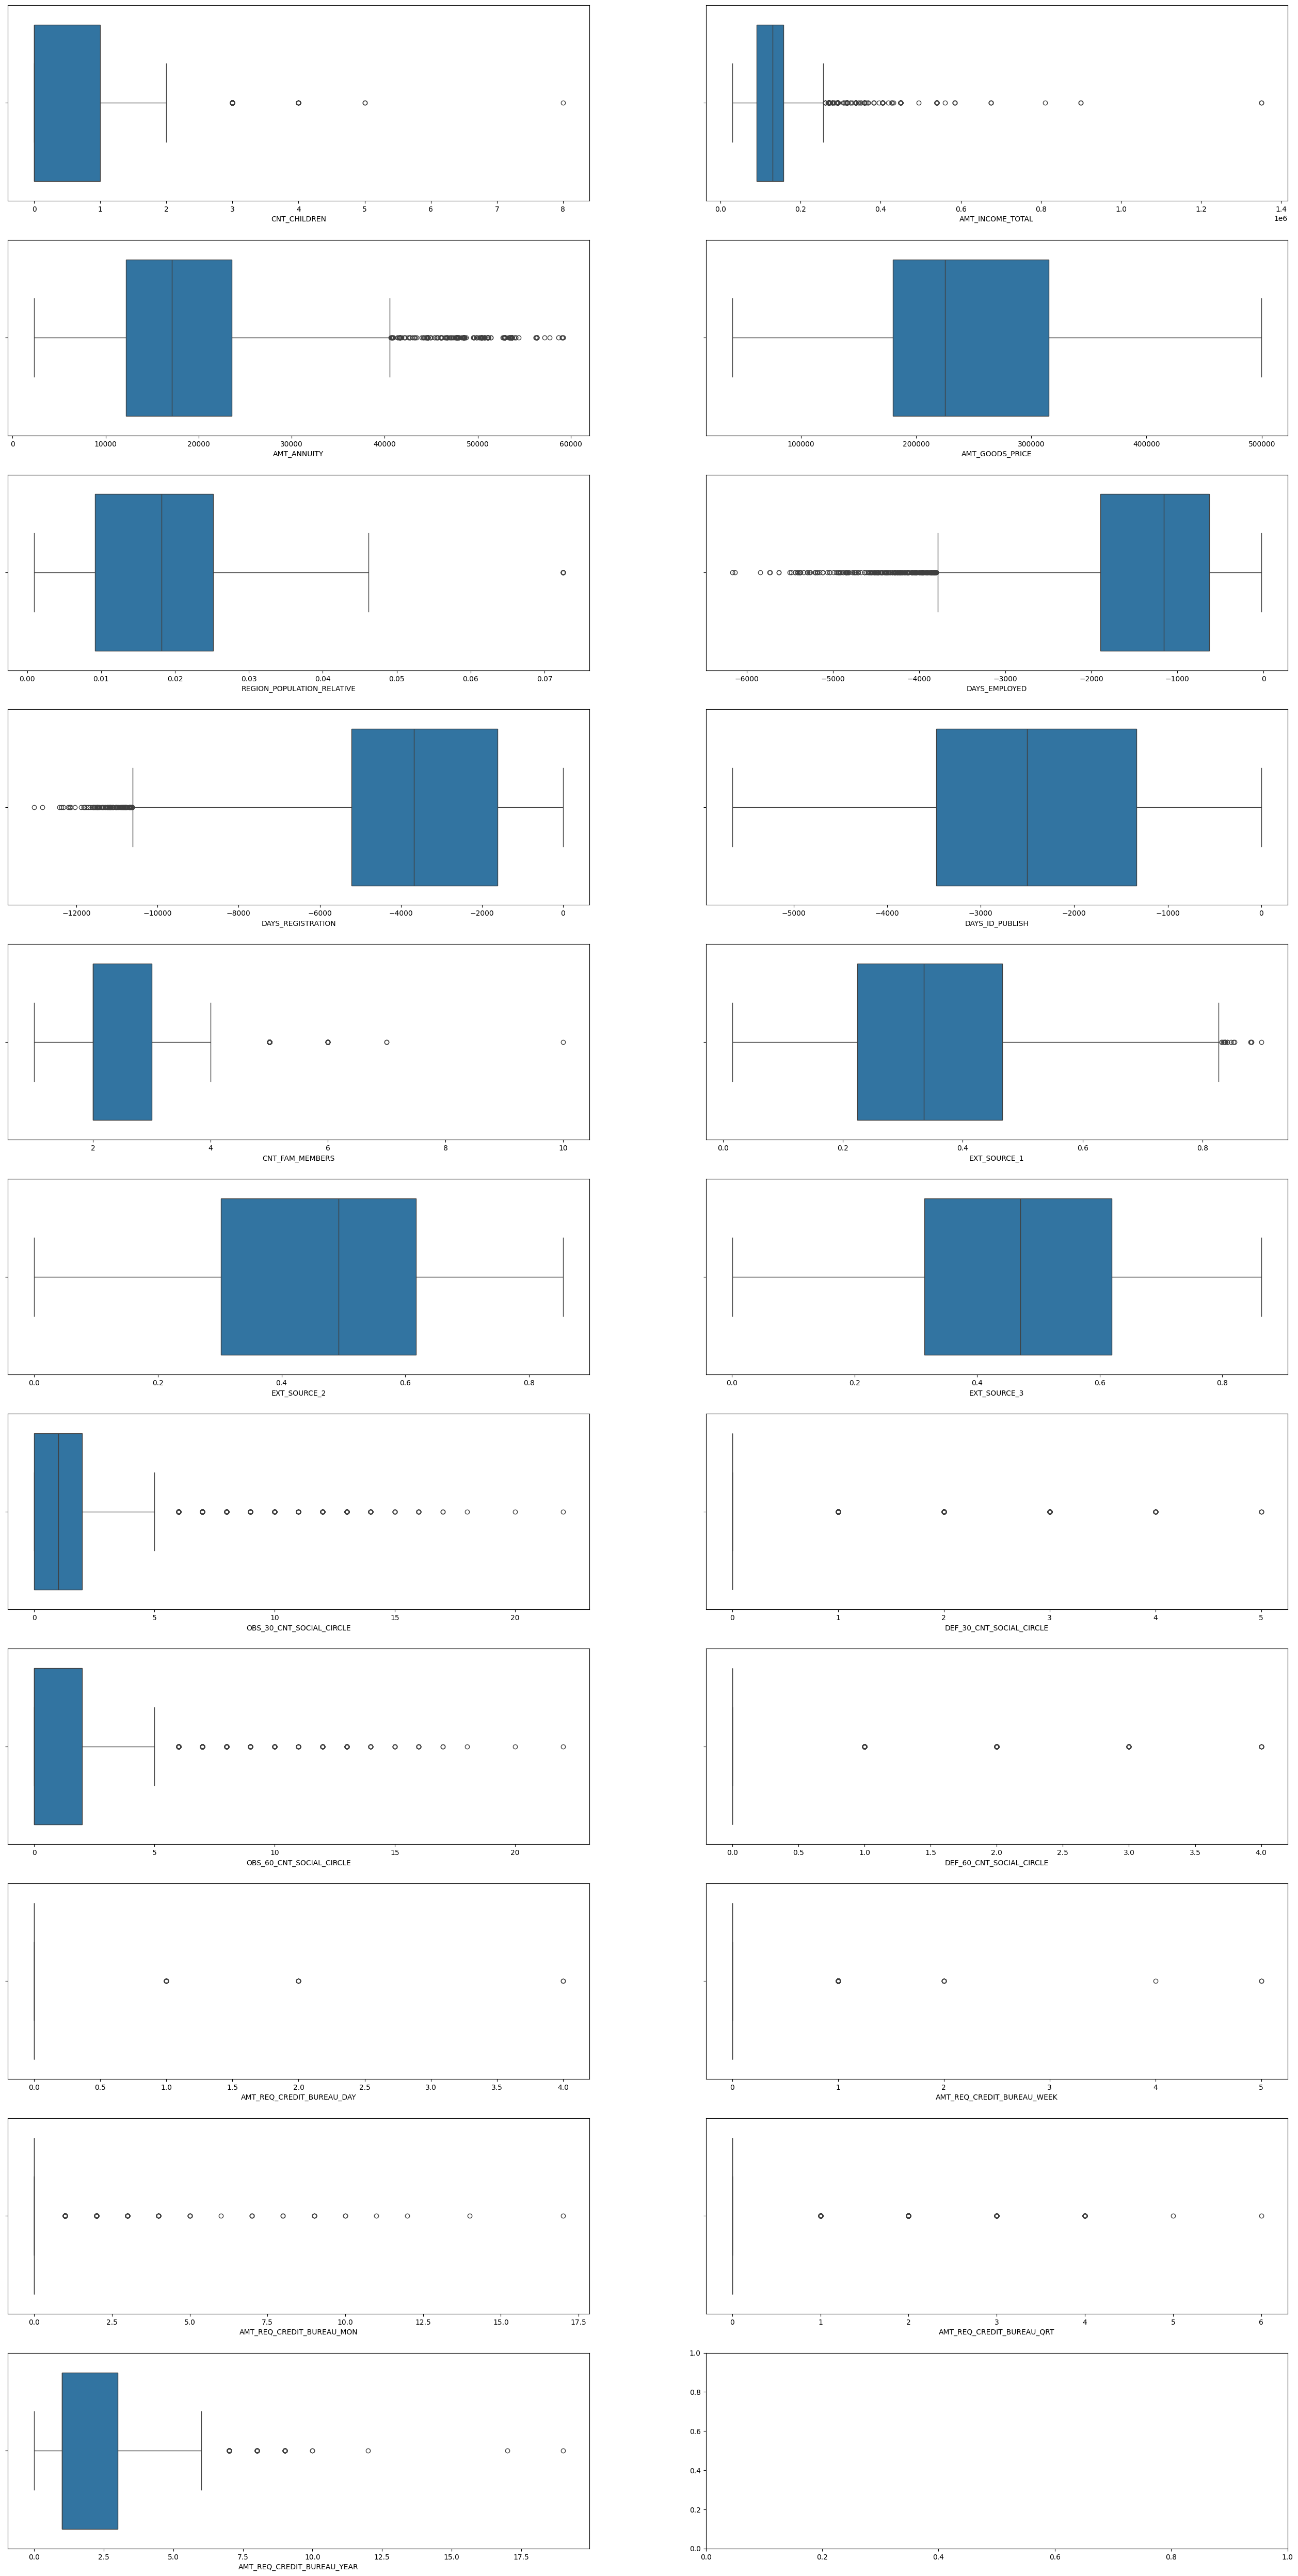

In [890]:
# sample code
# Variables not included due to non-numerical values involved or low numerical values:
    # Categorical values - "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",

    # OWN_CAR_AGE can't be analysed due to data cells with "Missing"

    # Limit set on values - AGE and AMT_CREDIT

    # Low values - "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "AMT_REQ_CREDIT_BUREAU_HOUR",

# create boxplots
large_numeric_var = [
                "CNT_CHILDREN",
                "AMT_INCOME_TOTAL",
                "AMT_ANNUITY",
                "AMT_GOODS_PRICE",
                "REGION_POPULATION_RELATIVE",
                "DAYS_EMPLOYED",
                "DAYS_REGISTRATION",
                "DAYS_ID_PUBLISH",
                "CNT_FAM_MEMBERS",
                "EXT_SOURCE_1",
                "EXT_SOURCE_2",
                "EXT_SOURCE_3",
                "OBS_30_CNT_SOCIAL_CIRCLE",
                "DEF_30_CNT_SOCIAL_CIRCLE",
                "OBS_60_CNT_SOCIAL_CIRCLE",
                "DEF_60_CNT_SOCIAL_CIRCLE",
                "AMT_REQ_CREDIT_BUREAU_DAY",
                "AMT_REQ_CREDIT_BUREAU_WEEK",
                "AMT_REQ_CREDIT_BUREAU_MON",
                "AMT_REQ_CREDIT_BUREAU_QRT",
                "AMT_REQ_CREDIT_BUREAU_YEAR"]

row_count=int(np.ceil(len(large_numeric_var)/2))

# create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=filtered_app_data, x = large_numeric_var[i],orient='h')
    axis.set_xlabel(str(large_numeric_var[i]))
    if i == len(large_numeric_var)-1: 
         break

# Show the plot
plt.show()


In [891]:
# Dropping columns with too many outliers and irrelevant columns
unclean_merged_data.drop(["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1,inplace=True)
unclean_merged_data

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AGE,AVG_AMT_CREDIT_SUM,AVG_AMT_CREDIT_SUM_DEBT,AVG_AMT_CREDIT_SUM_OVERDUE,NUM_SOLD_LOANS,ACTIVE_CLOSE_DEBT_RATIO,BAD_DEBT_CLOSE_RATIO
0,100026,0,N,N,1,450000.00,497520.00,32521.50,450000.00,Working,...,NaN,0.46,0.36,30,1875000.00,1738907.19,0.00,0.00,2.00,0.00
1,100041,0,N,N,0,112500.00,450000.00,44509.50,450000.00,Working,...,NaN,0.66,0.68,33,63254.24,0.00,0.00,0.00,0.08,0.00
2,100052,0,N,Y,1,90000.00,180000.00,9000.00,180000.00,Working,...,NaN,0.54,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN
3,100061,0,N,Y,2,225000.00,314055.00,16164.00,238500.00,Commercial associate,...,0.19,0.70,0.70,28,37741.50,0.00,0.00,0.00,0.00,0.00
4,100089,0,N,Y,0,135000.00,337761.00,15781.50,256500.00,Working,...,NaN,0.55,0.54,26,116545.50,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,456078,0,N,Y,0,112500.00,390960.00,21339.00,337500.00,Working,...,NaN,0.27,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
8267,456108,1,N,Y,1,135000.00,457834.50,33444.00,378000.00,Working,...,NaN,0.15,0.13,34,168275.04,108897.75,0.00,0.00,1.00,0.00
8268,456110,0,Y,Y,2,180000.00,180000.00,9000.00,180000.00,Commercial associate,...,0.41,0.62,NaN,34,6760620.00,6510321.00,0.00,0.00,inf,NaN
8269,456174,0,N,N,2,135000.00,215640.00,17064.00,180000.00,Working,...,0.31,0.66,0.78,30,64469.25,0.00,0.00,0.00,0.00,0.00


### Identifying Highly Correlated Variables

Our team plotted a heatmap to visualise the correlation between the variables and dropped highly correlated variables

<Axes: >

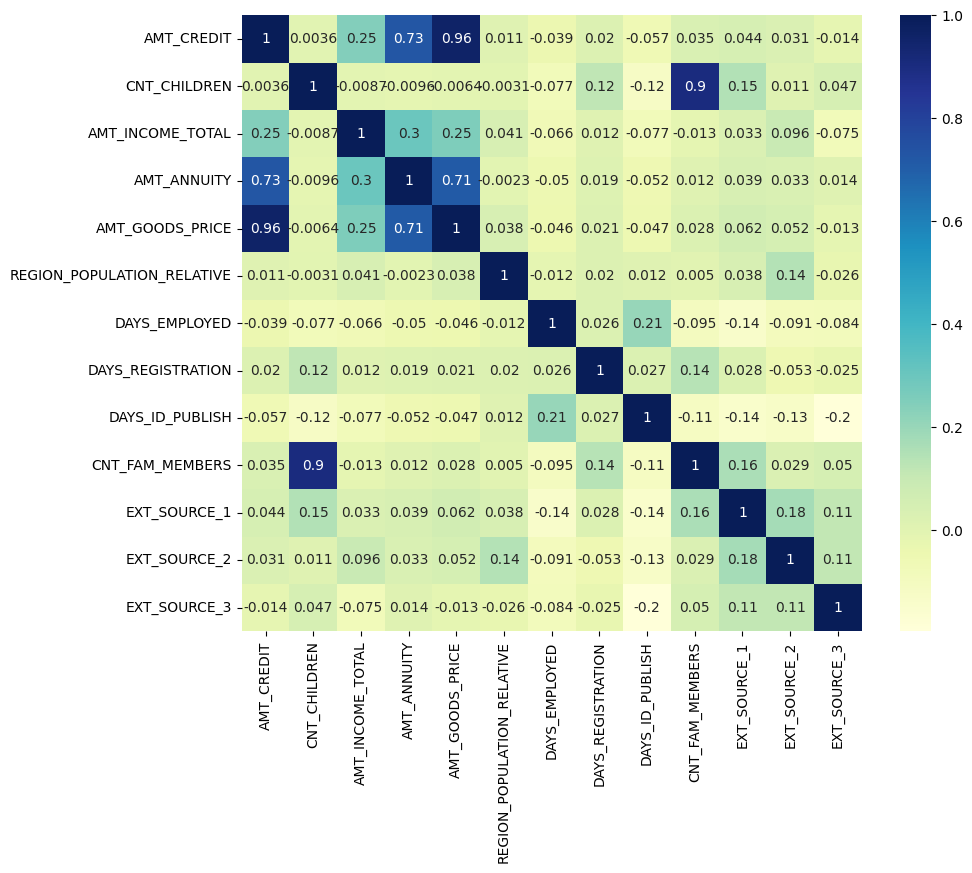

In [892]:
# sample code 
# OWN_CAR_AGE can't be analysed due to data cells with "Missing"

    # Limit set on values - AGE and AMT_CREDIT

    # Low values - "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "AMT_REQ_CREDIT_BUREAU_HOUR",

# create boxplots
# generate correlation maxtrix
numerical_cols = ["AMT_CREDIT",
                "CNT_CHILDREN",
                "AMT_INCOME_TOTAL",
                "AMT_ANNUITY",
                "AMT_GOODS_PRICE",
                "REGION_POPULATION_RELATIVE",
                "DAYS_EMPLOYED",
                "DAYS_REGISTRATION",
                "DAYS_ID_PUBLISH",
                "CNT_FAM_MEMBERS",
                "EXT_SOURCE_1",
                "EXT_SOURCE_2",
                "EXT_SOURCE_3"]
cor = unclean_merged_data[numerical_cols].corr()

# plot heat map
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

Side Note: Might Delete this away! cause i already removed based on the outliers <br/>
####  Highly correlated variables (r > 0.7)
- CNT_CHILDREN & CNT_FAM_MEMBERS: corr 0.9 --> drop CNT_CHILDREN as CNT_FAM_MEMBERS includes cnt_children
- AMT_CREDIT & AMT_ANNUITY: corr 0.73 --> drop AMT_ANNUITY as anuity is calculated from AMT_CREDIT
- AMT_CREDIT & AMT_GOODS_PRICE: corr 0.96 --> drop AMT_GOODS_PRICE as it is included in AMT_CREDIT
- AMT_ANNUITY & AMT_GOODS_PRICE: corr 0.71 --> dropped both as seen above

In [893]:
unclean_merged_data.drop(["CNT_CHILDREN","AMT_ANNUITY", "AMT_GOODS_PRICE"], axis=1, inplace=True)

### Dropping unncessary columns because of relative to business context
- SK_ID_CURR
- REGION_POPULATION_RELATIVE
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- AVG_AMT_CREDIT_SUM
- REGION_RATING_CLIENT_W_CITY
- REGION_RATING_CLIENT
- EXT_SOURCE_1
- EXT_SOURCE_2
- EXT_SOURCE_3

In [894]:
# Drop unnecessary columns mentioned 
unclean_merged_data.drop(["SK_ID_CURR","REGION_POPULATION_RELATIVE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","AVG_AMT_CREDIT_SUM","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT"], axis=1,inplace=True)

In [895]:
len(unclean_merged_data.columns)

21

### Calculating IVs for all columns



In [896]:
bins = sc.woebin(unclean_merged_data,y='TARGET')

[INFO] creating woe binning ...


/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:320: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_bin = dtm.groupby('bin', group_keys=False)['y'].agg([n0, n1])\
/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:136: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  binning_sv = pd.merge(
/Users/jackyteo/Library/Python/3.9/lib/python/site-packages/scorecardpy/woebin.py:136: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To

{'AGE': <Figure size 640x480 with 2 Axes>,
 'CNT_FAM_MEMBERS': <Figure size 640x480 with 2 Axes>,
 'FLAG_OWN_CAR': <Figure size 640x480 with 2 Axes>,
 'ACTIVE_CLOSE_DEBT_RATIO': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_1': <Figure size 640x480 with 2 Axes>,
 'NAME_FAMILY_STATUS': <Figure size 640x480 with 2 Axes>,
 'NAME_HOUSING_TYPE': <Figure size 640x480 with 2 Axes>,
 'FLAG_OWN_REALTY': <Figure size 640x480 with 2 Axes>,
 'DAYS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'AVG_AMT_CREDIT_SUM_OVERDUE': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'NUM_SOLD_LOANS': <Figure size 640x480 with 2 Axes>,
 'OCCUPATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 640x480 with 2 Axes>,
 'AVG_AMT_CREDIT_SUM_DEBT': <Figure size 640x480 with 2 Axes>,
 'BAD_DEBT_CLOSE_RATIO': <Figure size 640x480 with 2 Axes>,
 

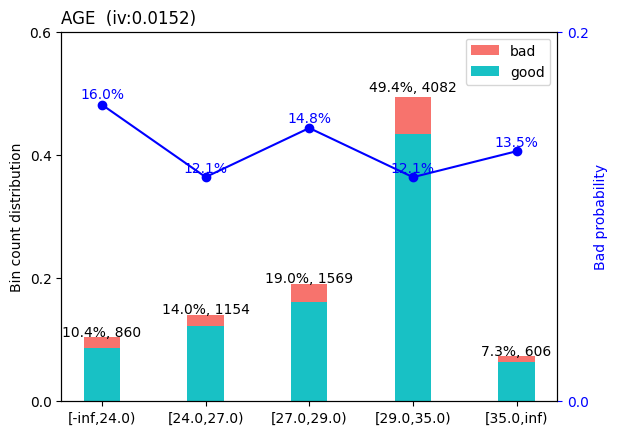

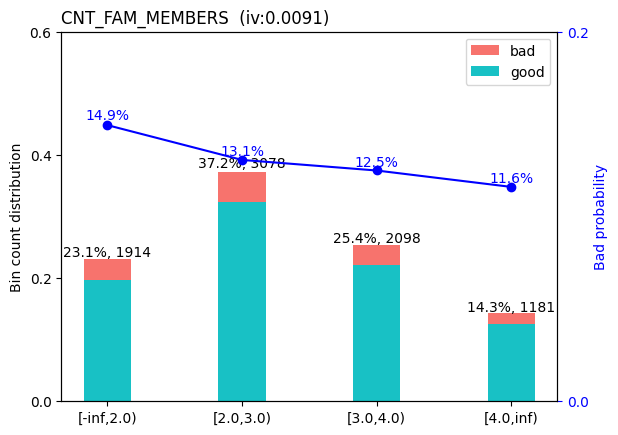

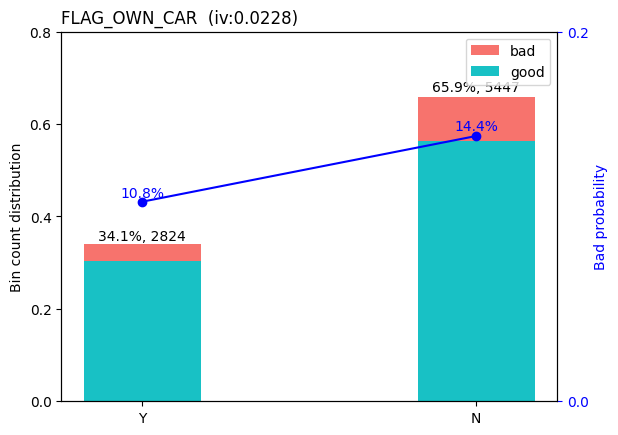

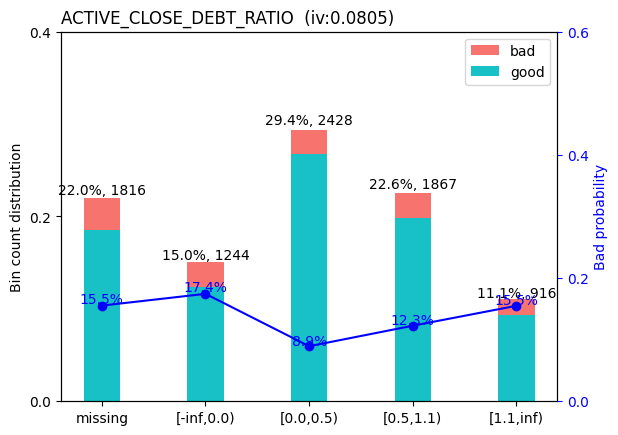

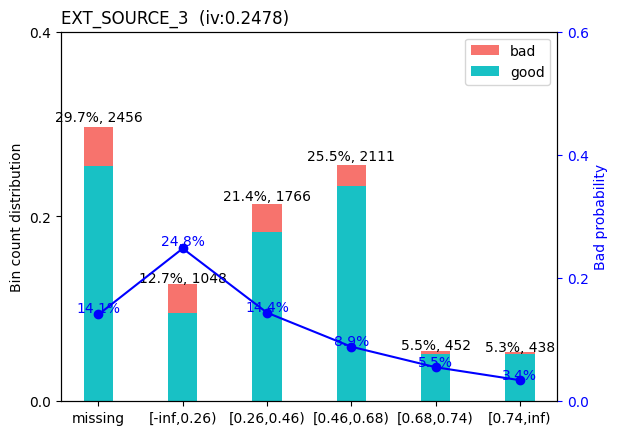

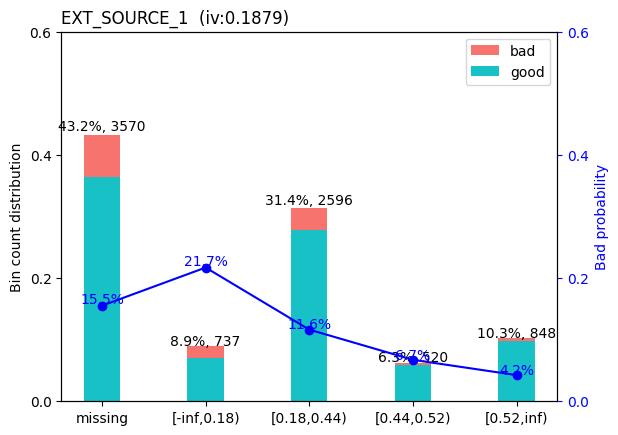

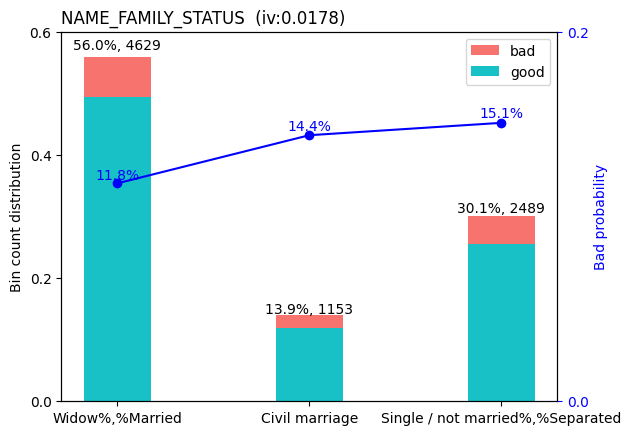

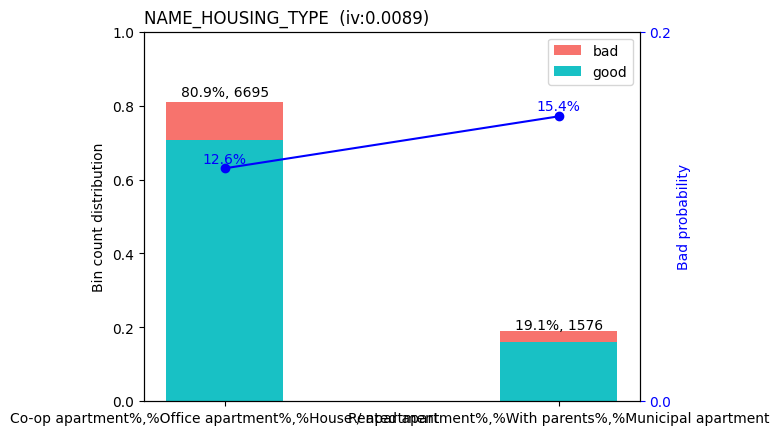

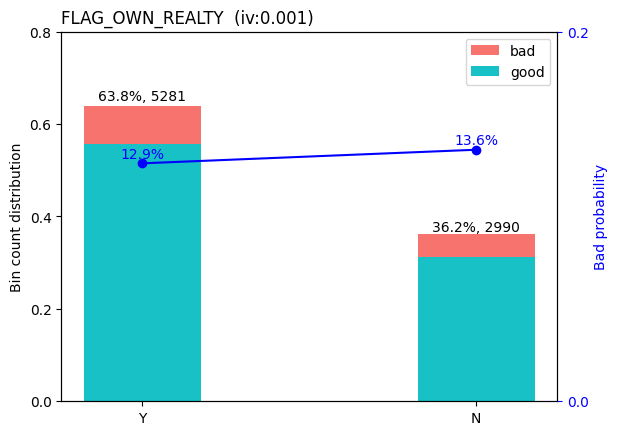

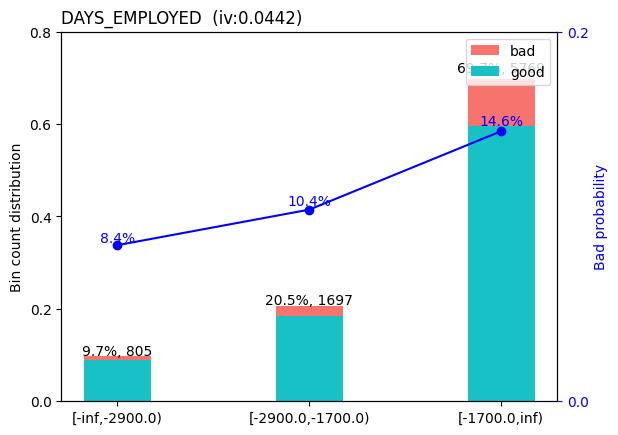

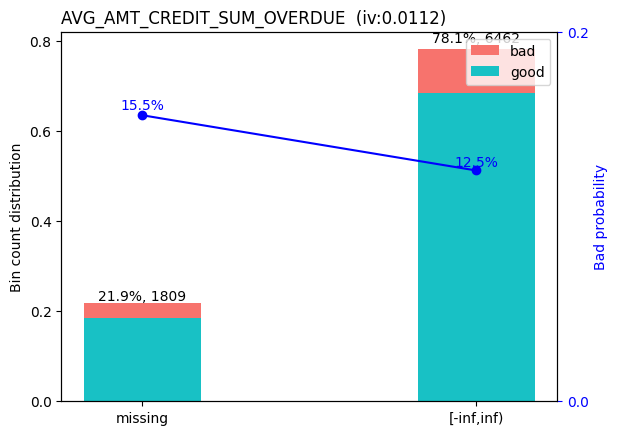

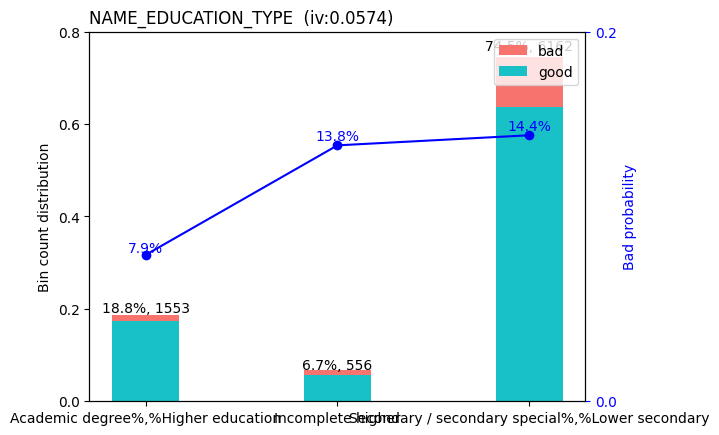

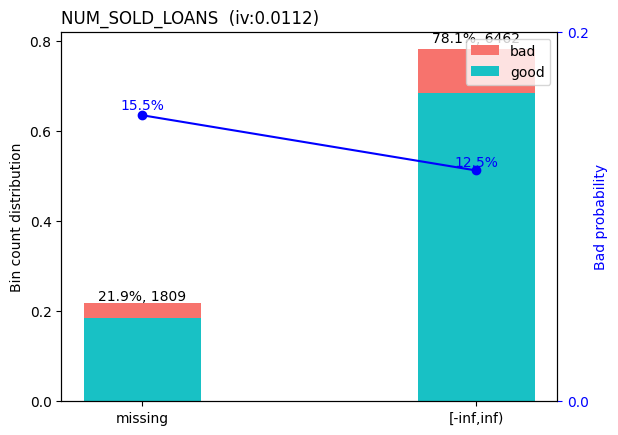

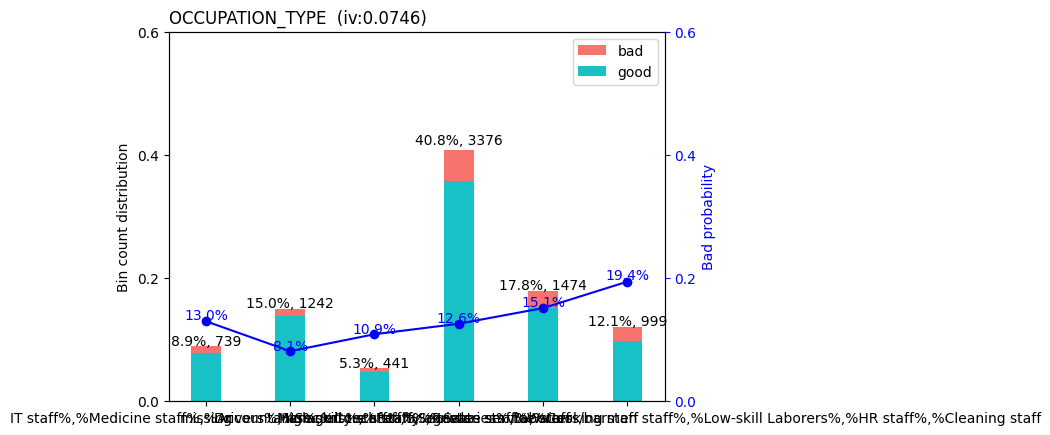

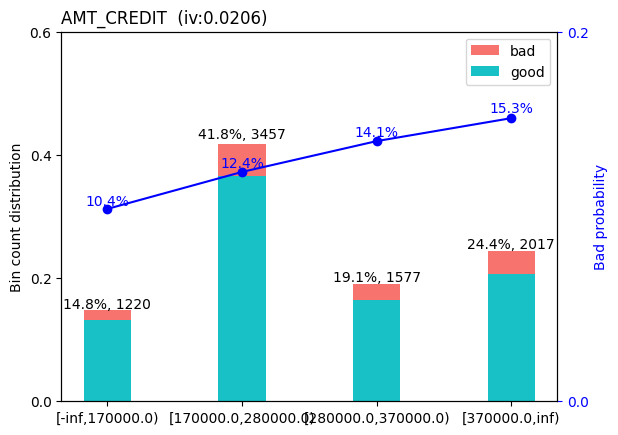

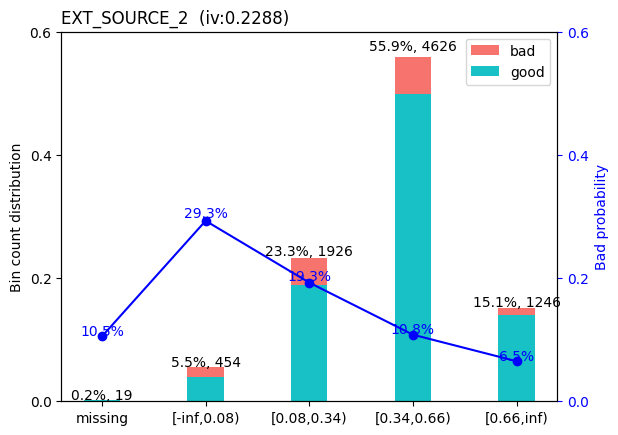

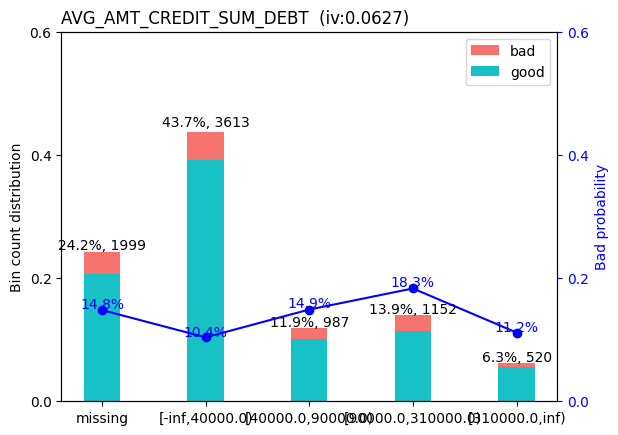

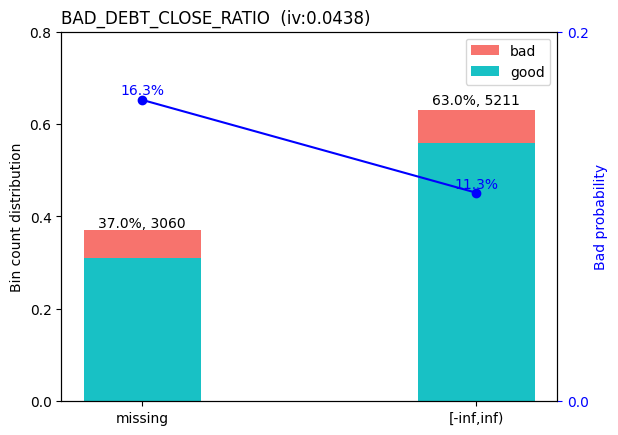

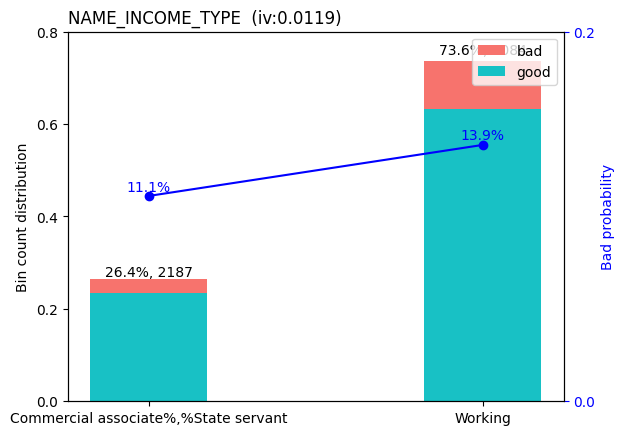

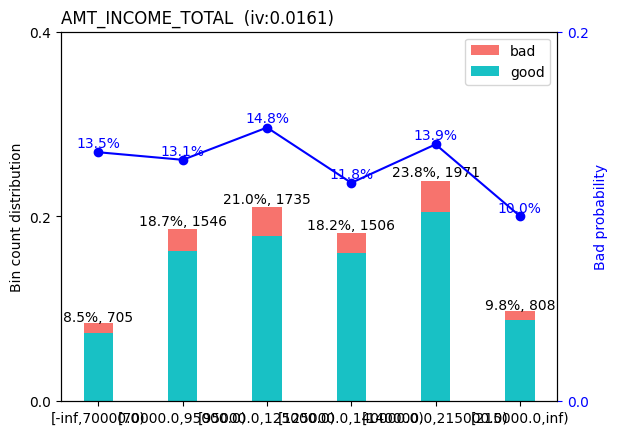

In [897]:
sc.woebin_plot(bins)

### Extract columns with IV >= 0.02

In [898]:
## Extract Columsn with IV > 0.02,  Drop values with no predictive power
# selected_columns = ["NAME_HOUSING_TYPE", "CNT_FAM_MEMBERS", "NUM_LOANS_SOLD", "NAME_INCOME_TYPE", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AGE", "TARGET"]
